## Clustering

In [8]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt

# import data
from sklearn.datasets import make_blobs

# import clustering algs
from sklearn.cluster import KMeans, MeanShift, DBSCAN
from sklearn.model_selection import train_test_split

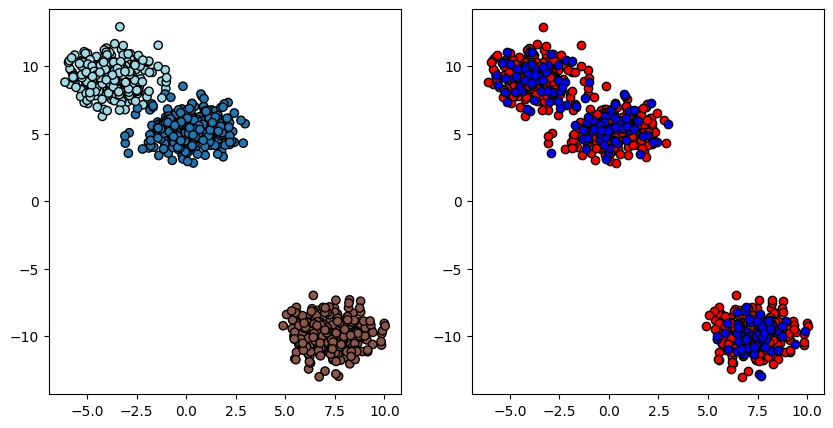

In [7]:
X , y = make_blobs(n_samples = 1000, n_features = 2, random_state=14) #, centers = clusters

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=1)

_, axes = plt.subplots(1,2,figsize = (10,5))
axes[0].scatter( X[:, 0], X[:, 1], c=y, cmap="tab20", edgecolor="k")
axes[1].scatter( X_train[:, 0], X_train[:, 1], c='r', edgecolors="k")
axes[1].scatter( X_test[:, 0], X_test[:, 1], c='b', edgecolors="k")
plt.show()

In [ ]:
# import decision boundaries function


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


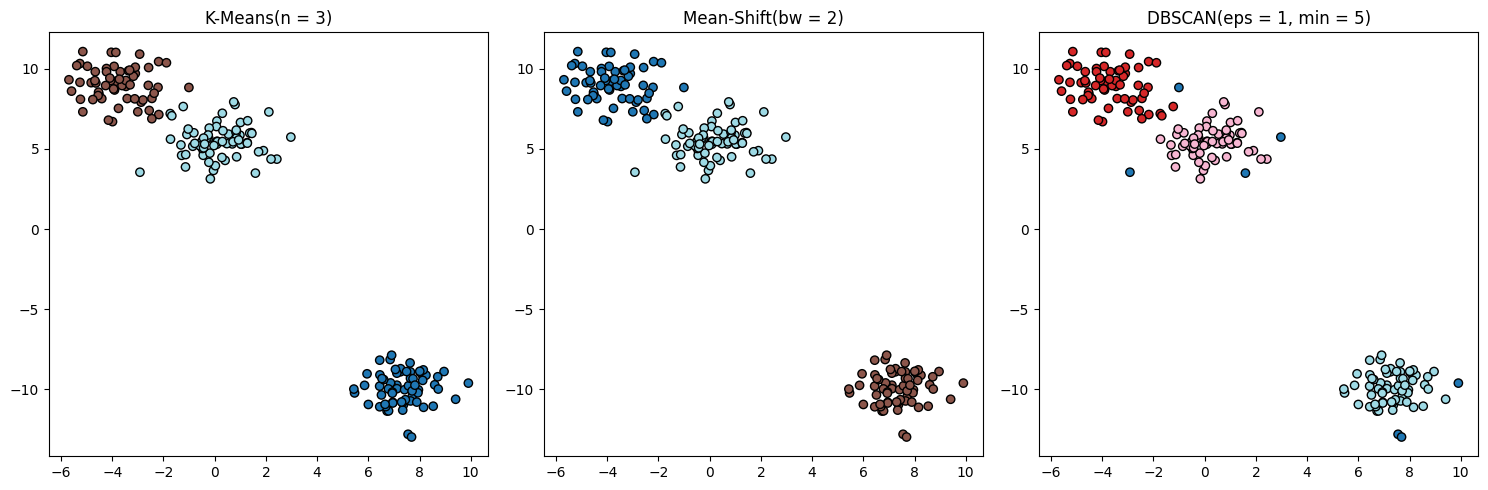

In [32]:
models = [  KMeans(n_clusters = 3) ,
            MeanShift(bandwidth = 2) ,
            DBSCAN(eps = 1, min_samples = 5) ]

model_names = ['K-Means(n = 3)','Mean-Shift(bw = 2)', 'DBSCAN(eps = 1, min = 5)']

_, axes = plt.subplots(1, len(model_names), figsize = (len(model_names)*5,5))
predictions = {}

# fit the model
for model, model_name, ax in zip(models, model_names, axes) :
    # Instance and train
    model.fit(X_train)

    if isinstance(model, DBSCAN):
      predictions[model_name] = model.fit_predict(X_test)
    else:
      # Predictions on train and test sets
      predictions[model_name] = model.predict(X_test)

    # Plot everything
    ax.scatter(X_test[:,0], X_test[:,1], c = predictions[model_name], edgecolors='k', cmap="tab20")
    ax.set_title(model_name)
plt.tight_layout()
plt.show()

## Metrics

The metrics module [Metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) de sklearn

In [18]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, silhouette_score

In [33]:
## Scores for training data

for model_name in model_names :
  print ("########----- Results for {0} -----########".format(model_name))
  ari = adjusted_rand_score( y_test ,predictions[model_name] )
  ami = adjusted_mutual_info_score( y_test , predictions[model_name])
  sil = silhouette_score(X_test, predictions[model_name],metric='euclidean')
  ##--------------
  print("-- ARI --\t -- AMI --\t -- SIL --")
  print("  {0:.3f}  \t   {1:.3f}  \t   {2:.3f}".format(ari, ami, sil))

########----- Results for K-Means(n = 3) -----########
-- ARI --	 -- AMI --	 -- SIL --
  0.971  	   0.952  	   0.731
########----- Results for Mean-Shift(bw = 2) -----########
-- ARI --	 -- AMI --	 -- SIL --
  0.971  	   0.952  	   0.731
########----- Results for DBSCAN(eps = 1, min = 5) -----########
-- ARI --	 -- AMI --	 -- SIL --
  0.902  	   0.866  	   0.671


In [ ]:
## Scores for test data

for i, key in enumerate(predsT.keys()):
  print ("########----- Results for {0} -----########".format( _ ))
  ari = adjusted_rand_score( _ , _ )
  ami = adjusted_mutual_info_score( _ , _ )
  ##--------------
  print("-- ARI --\t -- AMI --\t --")
  print("  {0:.3f}  \t   {1:.3f}  \t   {2:.3f}  \t".format(ari, ami))

## In real data

In [ ]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt

# import data
from sklearn.datasets import load_digits

In [ ]:
digits = load_digits()
images = (digits.images > 6) * 1.0

_, axes = plt.subplots(1,10, figsize=(20,4))
for i, ax in enumerate(axes):
  ax.imshow(images[i].reshape(8,8), cmap="gray")

plt.show()